# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mplt

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
lend_df = pd.read_csv("Resources/lending_data.csv")
lend_df


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I believe linear regression makes more sense because the Random Forest model takes into account too much of the extraneous data that isn't related to credit scores. 

## Split the Data into Training and Testing Sets

In [3]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
y = lend_df['loan_status'].values
X = lend_df.drop('loan_status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [4]:
np.unique(y)

array([0, 1], dtype=int64)

In [5]:
#scaling data based on the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [6]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=100000)
classifier

LogisticRegression(max_iter=100000)

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [8]:
print(f"Data Score: {classifier.score(X_train, y_train)}")
print(f"Data Score: {classifier.score(X_test, y_test)}")

Data Score: 0.9919177328380795
Data Score: 0.9924680148576145


In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18699,    93],
       [   53,   539]], dtype=int64)

In [11]:
#accuracy check
tp,tn,fp,fn = confusion_matrix(y_true, y_pred).ravel()
acc = (tp  + tn) / (tp  + tn + fp + fn) 
print(f"Accuracy: {acc}")

Accuracy: 0.9694593479158069


In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [14]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Test Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Test Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


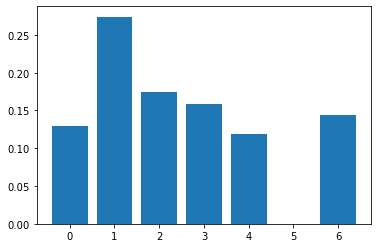

In [17]:
features = clf.feature_importances_
print(features)
mplt.bar(x = range(len(features)), height=features)
mplt.show()

In [18]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In my opinion the Linear Regression did perform better though the random forest classifier was very close. Accuracy 0.9924680148576145 vs 0.9917457697069748.